In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls

 creditcard.csv   handDigits.ipynb   Untitled0.ipynb
 dtree_pipe.png  'Task 5_7.ipynb'    Untitled1.ipynb


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

np.random.seed(2)

# `STEP #1: IMPORTING DATA & get intuition about dataset`

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_card = pd.read_csv('creditcard.csv')

In [ ]:
df_card.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0


In [ ]:
df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,...,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


# `STEP #2: DATA CLEANING`

In [ ]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### `CLEANED`

# `STEP #3: VISUALIZING THE DATA`

# `STEP #4: FEATURE ENGINEERING`
- drop Time column

In [ ]:
if 'Time' in df_card.columns:
  df_card.drop(columns='Time', inplace=True)
df_card.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

# `STEP #5: SPLIT then PREPROCESSING DATA`
- there is no categorical features so scaling num features is enough

In [ ]:
test_size = 0.3

from sklearn.model_selection import train_test_split

x = df_card.drop(columns='Class')
y = df_card['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [ ]:
np.array(x_train['Amount']).reshape(-1, 1).shape

(199364, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(np.array(x_train['Amount']).reshape(-1, 1))

x_train['Amount'] = sc.transform(np.array(x_train['Amount']).reshape(-1, 1))
x_test['Amount'] = sc.transform(np.array(x_test['Amount']).reshape(-1, 1))

In [ ]:
x_train.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.13207,0.10704,-0.65059,-0.99603,1.81433,1.74074,0.49685,0.63302,0.01718,-0.36271,...,-0.06261,-0.06249,0.00529,0.25152,-2.46681,-0.88969,0.33746,0.30639,0.07482,-0.16569
204520,2.12599,0.01421,-1.51476,0.11502,0.59851,-0.33324,0.19929,-0.26435,0.38411,0.02875,...,-0.08608,-0.32937,-0.78815,0.26773,0.06612,-0.13578,0.20384,-0.06827,-0.05768,-0.35224


# `STEP #6: MODELS TRAINING && Evaluation`

### - Deep neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

model = Sequential(layers=[
    Dense(units=16, input_dim=29, activation='relu', name='Dense_1'),
    Dense(units=24, activation='relu', name='Dense_2'),
    Dropout(0.5),
    Dense(units=20, activation='relu', name='Dense_3'),
    Dropout(0.5),
    Dense(units=24, activation='relu', name='Dense_4'),
    Dense(units=1, activation='sigmoid', name='Dense_5')
], name='dnn')

model.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                480       
                                                                 
 Dense_2 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 Dense_3 (Dense)             (None, 20)                500       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 Dense_4 (Dense)             (None, 24)                504       
                                                                 
 Dense_5 (Dense)             (None, 1)                 25      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0111 - accuracy: 0.9982
Epoch 2/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0055 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0049 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0046 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0042 - accuracy: 0.9993


In [ ]:
score = model.evaluate(x_test, y_test)
score

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9993


[0.004699627868831158, 0.9993329048156738]

Without Dropout layers

In [ ]:
model2 = Sequential(layers=[
    Dense(units=16, input_dim=29, activation='relu', name='Dense_1'),
    Dense(units=24, activation='relu', name='Dense_2'),
    Dense(units=20, activation='relu', name='Dense_3'),
    Dense(units=24, activation='relu', name='Dense_4'),
    Dense(units=1, activation='sigmoid', name='Dense_5')
], name='dnn2')

model2.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
model2.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0063 - accuracy: 0.9991
Epoch 2/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 29s 2ms/step - loss: 0.0027 - accuracy: 0.9994


In [ ]:
score2 = model2.evaluate(x_test, y_test)
score2

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9994


[0.0040337019599974155, 0.9993562698364258]

In [ ]:
y_test_hat_model1 = model.predict(x_test).round()
y_test_hat_model2 = model2.predict(x_test).round()

2671/2671 [==============================] - 4s 2ms/step


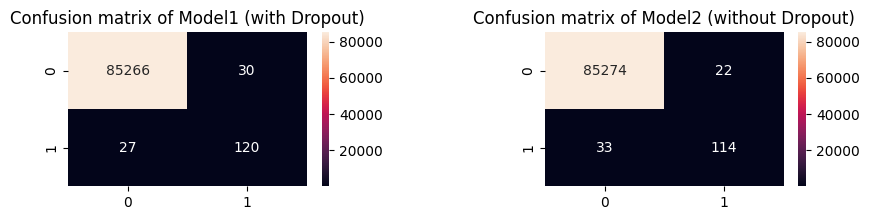

In [ ]:
plt.subplots(1, 2, figsize=(10,2))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_test_hat_model1), annot=True, fmt='g')
plt.title('Confusion matrix of Model1 (with Dropout)')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_test_hat_model2), annot=True, fmt='g')
plt.title('Confusion matrix of Model2 (without Dropout)')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print('classification report for dropout model:')
print(classification_report(y_test, y_test_hat_model1))

classification report for dropout model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.82      0.81       147

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



- So you saw that without dropout model failed to predict all positive examples

### - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

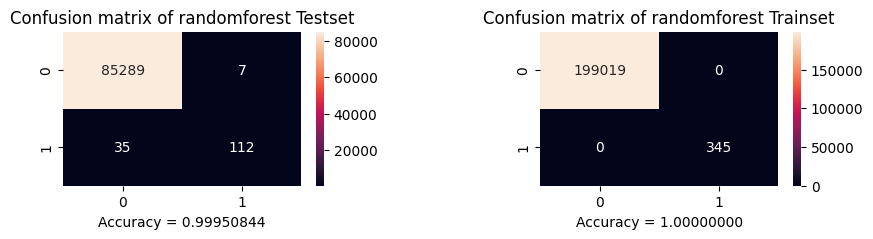

In [ ]:
accuracy_score,
y_test_hat_tree = rfc.predict(x_test)
y_train_hat_tree = rfc.predict(x_train)

plt.subplots(1, 2, figsize=(10,2))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_test_hat_tree), annot=True, fmt='g')
plt.title('Confusion matrix of randomforest Testset')
plt.xlabel(f'Accuracy = {accuracy_score(y_test, y_test_hat_tree):.8f}')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_train, y_train_hat_tree), annot=True, fmt='g')
plt.title('Confusion matrix of randomforest Trainset')
plt.xlabel(f'Accuracy = {accuracy_score(y_train, y_train_hat_tree):.8f}')

plt.show()

In [ ]:
'''
#Just For Fun
graph = Source( tree.export_graphviz(rfc.estimators_[2], out_file=None, feature_names=x.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
'''

### - NN + Undersampling

In [ ]:
pos_count = y.value_counts()[1]
pos_indices = y[y==1].index
all_neg_indices = y[y==0].index
x_pos = x.iloc[y[y==1].index,:]
x_neg = x.iloc[np.random.choice(all_neg_indices, pos_count, replace=False),:]


In [ ]:
x_under = pd.concat([x_pos,x_neg])
y_under = y.iloc[x_under.index]

x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=test_size, random_state=0)
x_train_under.shape, x_test_under.shape, y_train_under.shape, y_test_under.shape

((688, 29), (296, 29), (688,), (296,))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_under, y_train_under, batch_size=10, epochs=20)

Epoch 1/20
69/69 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8924
Epoch 2/20
69/69 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8983
Epoch 3/20
69/69 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9099
Epoch 4/20
69/69 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.9113
Epoch 5/20
69/69 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.9041
Epoch 6/20
69/69 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.9084
Epoch 7/20
69/69 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9157
Epoch 8/20
69/69 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9099
Epoch 9/20
69/69 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9142
Epoch 10/20
69/69 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9128
Epoch 11/20
69/69 [

10/10 [==============================] - 0s 2ms/step


Text(0.5, 23.52222222222222, 'Accuracy = 0.91216216')

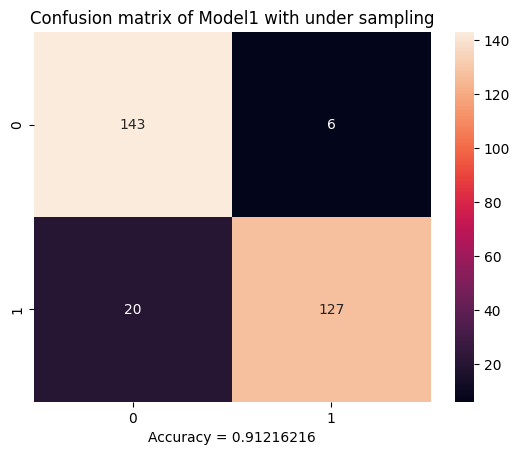

In [ ]:
y_test_hat_model1_under = model.predict(x_test_under).round()
sns.heatmap(confusion_matrix(y_test_under, y_test_hat_model1_under), annot=True, fmt='g')
plt.title('Confusion matrix of Model1 with under sampling')
plt.xlabel(f'Accuracy = {accuracy_score(y_test_under, y_test_hat_model1_under):.8f}')

8901/8901 [==============================] - 8s 932us/step


Text(0.5, 23.52222222222222, 'Accuracy = 0.97603640')

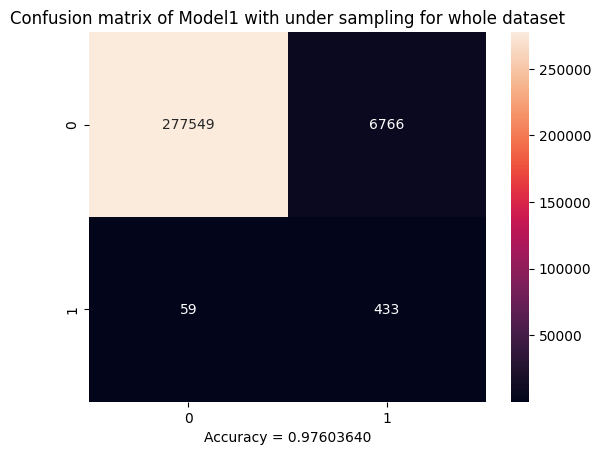

In [ ]:
y_hat_model1 = model.predict(x).round()
sns.heatmap(confusion_matrix(y, y_hat_model1), annot=True, fmt='g')
plt.title('Confusion matrix of Model1 with under sampling for whole dataset')
plt.xlabel(f'Accuracy = {accuracy_score(y, y_hat_model1):.8f}')

### - NN + Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

x_over, y_over = SMOTE().fit_resample(x,y)
x_over.shape, y_over.shape, x.shape, y.shape

((568630, 29), (568630,), (284807, 29), (284807,))

In [ ]:
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(x_over,y_over,test_size=0.3, random_state=0)
x_train_over.shape, x_test_over.shape, y_train_over.shape, y_test_over.shape

((398041, 29), (170589, 29), (398041,), (170589,))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_over, y_train_over, batch_size=20, epochs=5)

Epoch 1/5
19903/19903 [==============================] - 30s 1ms/step - loss: 0.0933 - accuracy: 0.9673
Epoch 2/5
19903/19903 [==============================] - 29s 1ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 3/5
19903/19903 [==============================] - 30s 2ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 4/5
19903/19903 [==============================] - 28s 1ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 5/5
19903/19903 [==============================] - 29s 1ms/step - loss: 0.0308 - accuracy: 0.9905


5331/5331 [==============================] - 5s 886us/step


Text(0.5, 23.52222222222222, 'Accuracy = 0.99269589')

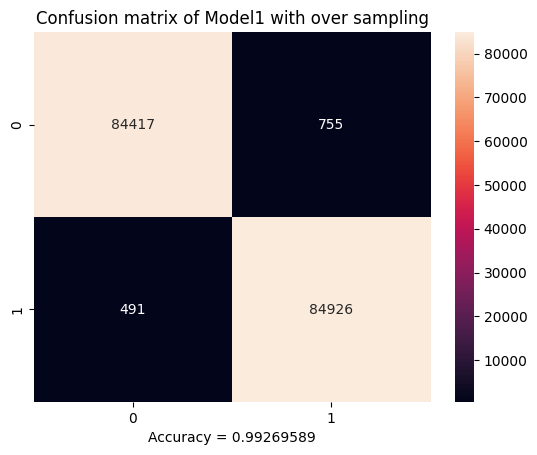

In [ ]:
y_test_hat_model1_over = model.predict(x_test_over).round()
sns.heatmap(confusion_matrix(y_test_over, y_test_hat_model1_over), annot=True, fmt='g')
plt.title('Confusion matrix of Model1 with over sampling')
plt.xlabel(f'Accuracy = {accuracy_score(y_test_over, y_test_hat_model1_over):.8f}')

# `STEP #7: Tuning`

remaining:
- try anomoly detection
- tuning
